# FAKE NEWS DETECTION

## IMPORTING RELEVANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## IMPORTING THE DATASETS

In [2]:
fake = pd.read_csv("dataset/Fake.csv")
true = pd.read_csv("dataset/True.csv")

## SHAPE OF THE DATASETS

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
fake['target'] = 'fake'
true['target'] = 'true'

## MERGING THE DATASETS

In [6]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
# Check the data
data.head()

,title,text,subject,date,target
0,PRO-HILLARY New York Daily News Writer DESTROY...,Gersh Kuntzman is a writer for the New York Da...,left-news,"May 4, 2017",fake
1,Republicans Block Young Voters From Participa...,"In Ohio, the District of Columbia, and 21 othe...",News,"March 7, 2016",fake
2,BOOM! 4 VENUES CANCEL KATHY GRIFFIN Appearance...,Backlash against Kathy Griffin continues to gr...,left-news,"Jun 2, 2017",fake
3,TRUMP SUPPORTERS STORM MAXINE WATERS TOWN HALL...,This is great! Trump supporters did everything...,left-news,"Jun 25, 2017",fake
4,VOTE FOR A DEMOCRAT In This State…Get A Prize!...,Every day we hear of more voter fraud being un...,politics,"Oct 14, 2016",fake


## REMOVING THE COLUMNS THAT WONT BE NECESSAY FOR THE ANALYSIS - DATE AND TITLE

In [9]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,PRO-HILLARY New York Daily News Writer DESTROY...,Gersh Kuntzman is a writer for the New York Da...,left-news,fake
1,Republicans Block Young Voters From Participa...,"In Ohio, the District of Columbia, and 21 othe...",News,fake
2,BOOM! 4 VENUES CANCEL KATHY GRIFFIN Appearance...,Backlash against Kathy Griffin continues to gr...,left-news,fake
3,TRUMP SUPPORTERS STORM MAXINE WATERS TOWN HALL...,This is great! Trump supporters did everything...,left-news,fake
4,VOTE FOR A DEMOCRAT In This State…Get A Prize!...,Every day we hear of more voter fraud being un...,politics,fake


In [10]:
# Removing the title 
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Gersh Kuntzman is a writer for the New York Da...,left-news,fake
1,"In Ohio, the District of Columbia, and 21 othe...",News,fake
2,Backlash against Kathy Griffin continues to gr...,left-news,fake
3,This is great! Trump supporters did everything...,left-news,fake
4,Every day we hear of more voter fraud being un...,politics,fake


## FURTHER MODIFICATIONS
### LOWERCASE CONVERSION

In [11]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,gersh kuntzman is a writer for the new york da...,left-news,fake
1,"in ohio, the district of columbia, and 21 othe...",News,fake
2,backlash against kathy griffin continues to gr...,left-news,fake
3,this is great! trump supporters did everything...,left-news,fake
4,every day we hear of more voter fraud being un...,politics,fake


### PUNCTUATION REMOVAL

In [12]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

### REMOVING STOPWORDS USING NLTK CORPUS

In [14]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,target
0,gersh kuntzman writer new york daily news also...,left-news,fake
1,ohio district columbia 21 states election year...,News,fake
2,backlash kathy griffin continues grow least fo...,left-news,fake
3,great trump supporters everything right ironic...,left-news,fake
4,every day hear voter fraud uncovered across un...,politics,fake


## EXPLORING THE DATA

### NUMBER OF ARTICLES

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


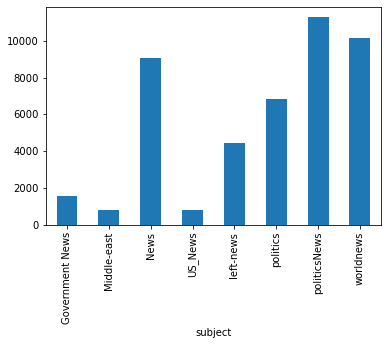

In [19]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


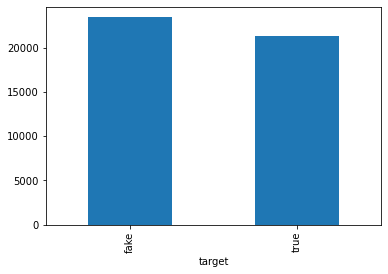

In [20]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

### WORDCLOUD REPRESENTATION

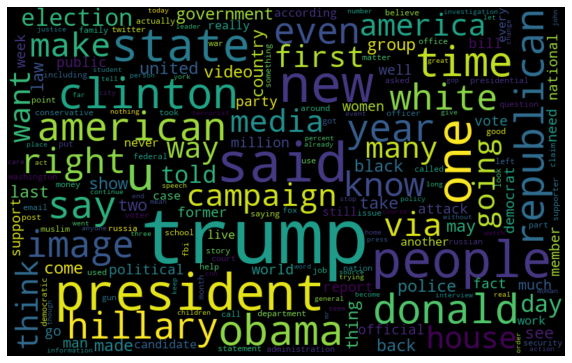

In [21]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

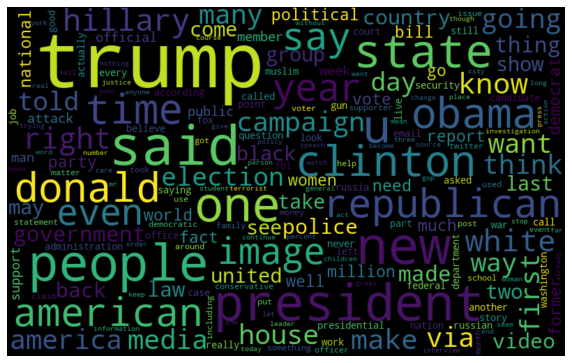

In [22]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### MOST FREQUENTLY OCCURING WORDS IN FAKE AND TRUE NEWS

In [23]:
   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

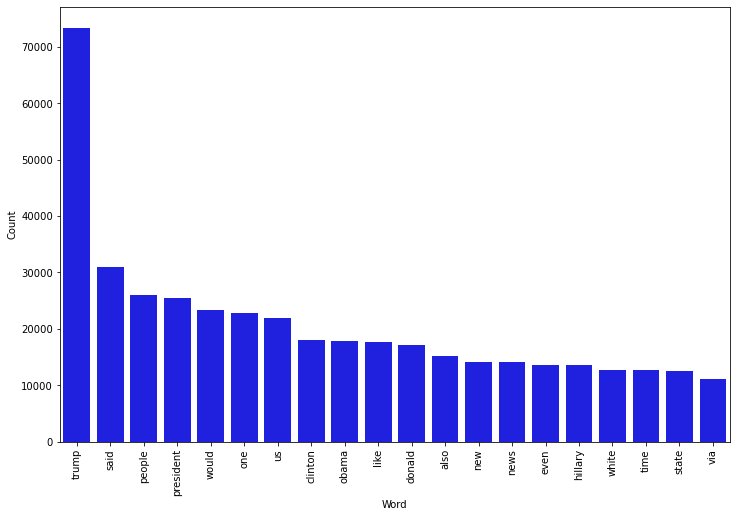

In [24]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

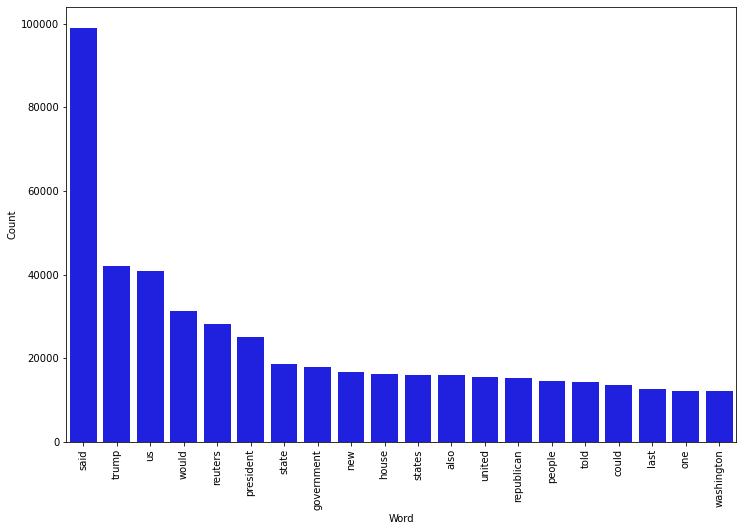

In [25]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

### PLOTTING CONFUSION MATRIX

In [26]:

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [27]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

### LOGISTIC REGRESSION

In [28]:

from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.94%


Confusion matrix, without normalization


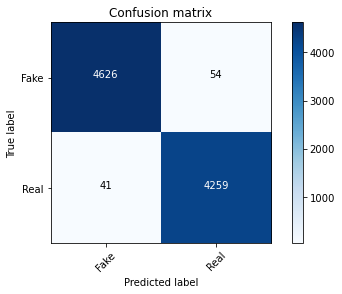

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### DECISION TREE CLASSIFIER

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.6%


Confusion matrix, without normalization


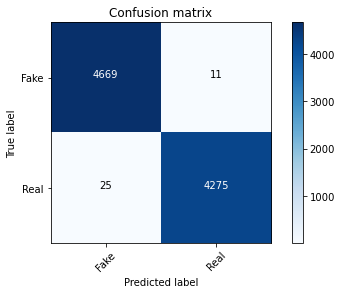

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])